#캘리포니아 주택가격 예측
## 데이터 가져오기
### 다운로드 데이터셋

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_PATH, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
    #예외처리

  tgz_path = os.path.join(housing_path, "housing.tgz")  #로컬에 저장될 패스가 저장
  urllib.request.urlretrieve(housing_url, filename=tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path) #다양한 객체의 메소드나 속성을 사용가능하다.
  housing_tgz.close()




In [2]:
fetch_housing_data

#파일 두개 생성

<function __main__.fetch_housing_data(housing_url='datasets\\housing', housing_path='datasets\\housing')>

In [3]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH) -> pd.DataFrame:
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

#### 변수 설명 -알아보자
-longitude:
-latitude:
-housing_median_age:

In [6]:
housing= load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


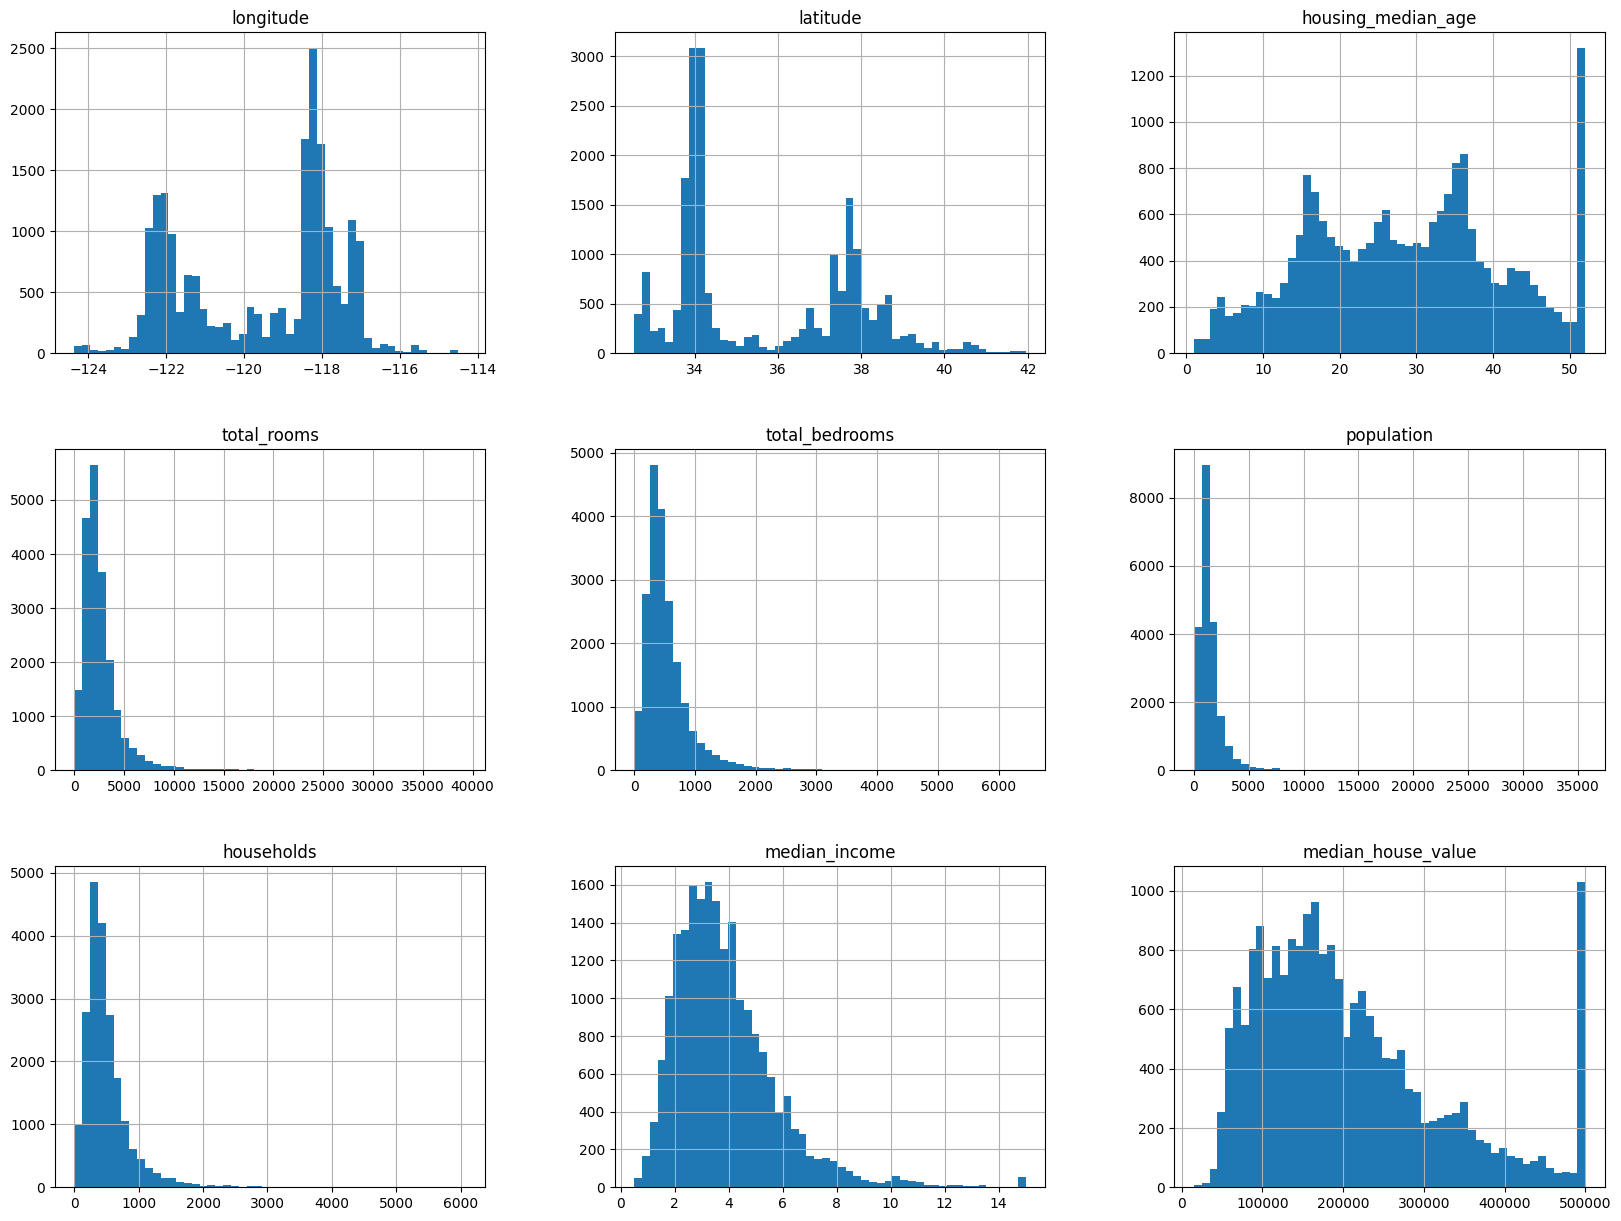

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
import numpy as np

np.random.seed(42)

In [11]:
def split_train_test(
    data: pd.DataFrame,
    test_ratio = 0.2
  ) -> tuple[pd.DataFrame, pd.DataFrame]:
  shuffled_indices = np.random.permutation(len(data))
  testset_size = int(len(data)*test_ratio)
  test_indices = shuffled_indices[:testset_size]
  train_indices =  shuffled_indices[testset_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
print(housing.shape)
trainset, testset = split_train_test(housing,0.2)
print(trainset.shape, testset.shape)

(20640, 10)
(16512, 10) (4128, 10)


home 들어가서
해당 터미널 클릭해서 열고

conda activate 이름
condea install scikit-learn

In [13]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(housing, test_size=0.2, random_state=42)
print(trainset.shape, testset.shape)

(16512, 10) (4128, 10)


In [14]:
testset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

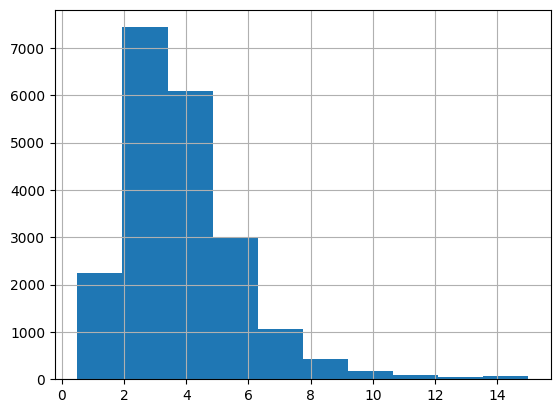

In [15]:
housing["median_income"].hist()

In [16]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1,2,3,4,5]
)
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

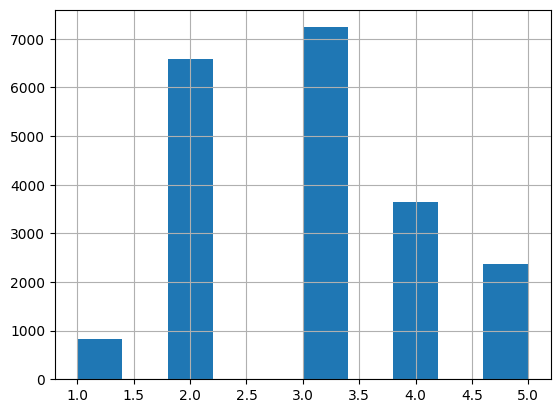

In [17]:
housing["income_cat"].hist()
#이런식의 분포로 만들어줘야함 한쪽으로 치우쳐있지않고

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):  # income_cat은 목표변수가 될 것
  strat_trainset = housing.loc[train_index]
  strat_testset = housing.loc[test_index]


#GIS 시각화

In [19]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

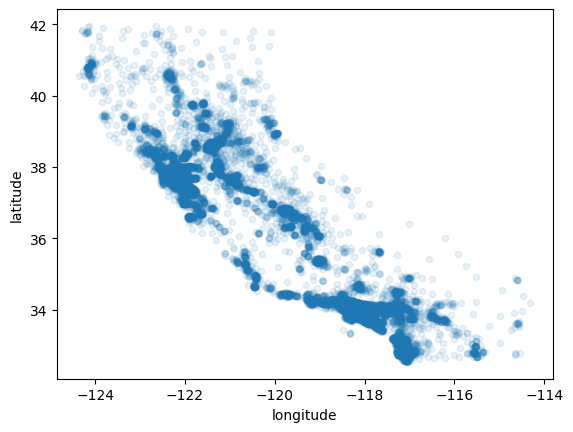

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

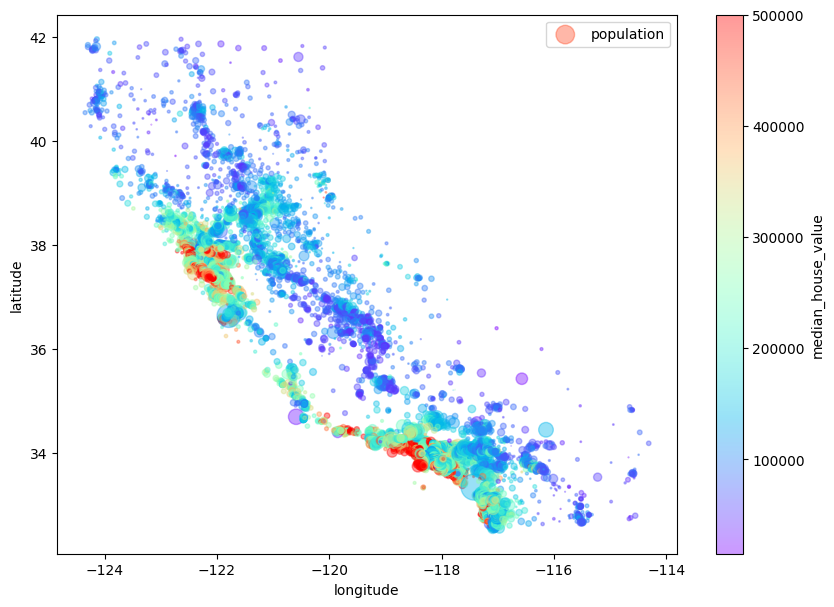

In [21]:
housing.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("rainbow"), colorbar=True,
    sharex=False
)
plt.legend()
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression

https://pycaret.gitbook.io/docs/get-started/quickstart

###모형 하나하나 실험하기보다 한번에

## 10/19

## 절대경로와 상대경로

```bash
# Windows
C:\Users\syu\Documents\kyungsu\ 달러

# Linux or Unix
/Users/syu/Documents/kyungsu/
```

In [25]:
PROJECT_ROOT_DIR = "."
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x1d460d17ac0>)

In [26]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))   #컨트롤쉬프트마이너스 셀분리
print(type(california_img), california_img.shape)
# R,G,B (red green blue, alpha(투명도))

<class 'numpy.ndarray'> (674, 594, 4)


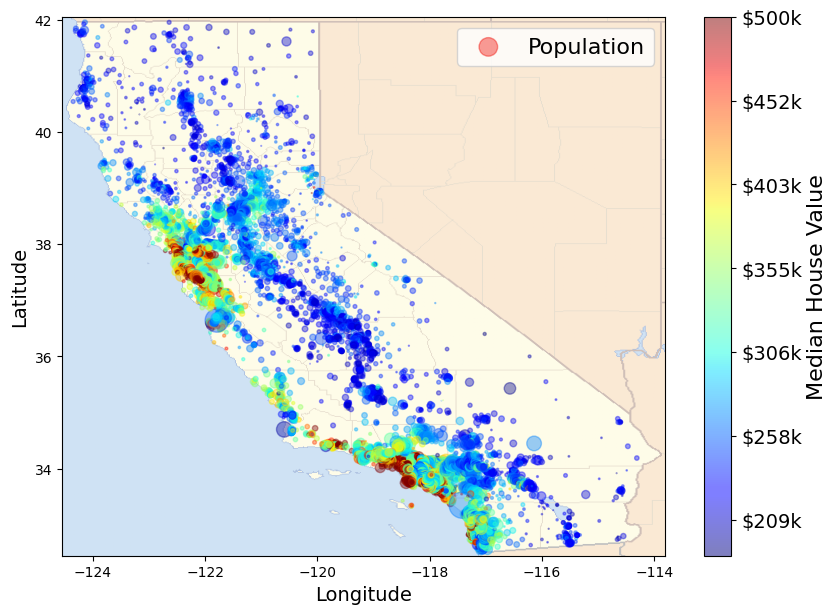

In [27]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)

# import matplotlib.pyplot as plt
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
# save_fig("california_housing_prices_plot")
plt.show()

## 상관관계 분석
<-1 ~ +1 사이의 수>
+1: 매우 양의 상관관계
+0.5 양의 상관관계
0 아무런 관계가 없다
-0.5 음의 상관관계
-1: 매우 음의 상관관계

In [28]:
housing.dtypes
#실수값과 다른 자료구조를 갖는 두가지를 뽑아서 처리

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
income_cat            category
dtype: object

In [29]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [30]:
corr_matrix = housing.iloc[:, :-2].corr()
#iloc 상관관계 분석 코드(함수)

In [31]:
corr_matrix
#-0.924664: 거의 -1의 상관관계를 갖음: 매우 음의 상관관계가 있다

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [32]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

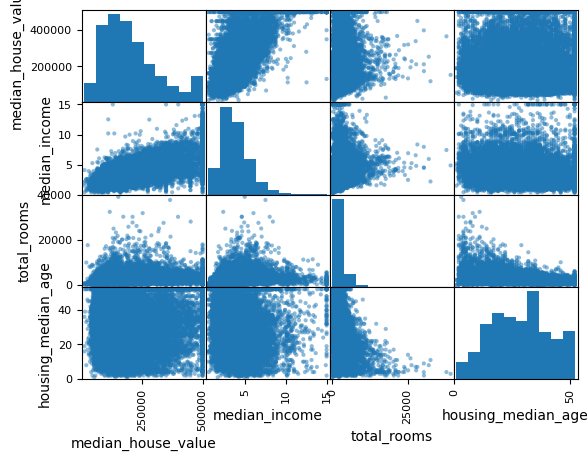

In [33]:
from pandas.plotting import scatter_matrix

attributes = [
    "median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes])
plt.show()
# scatter가 퍼져있지 않고, 선형으로 이루어지면 상관관계를 갖는다
# pandas의 plotting보다 plotly, bokeh를 이용

In [34]:
housing.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
income_cat            category
dtype: object

## 파생변수 생성

In [35]:
housing["total_rooms"] / housing["households"]

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Length: 20640, dtype: float64

https://codingalzi.github.io/datapy/casestudy_california_housing.html
변수 제대로 파악 

In [36]:
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')


In [37]:
#판다스에서의 새로운 변수 생성
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')


In [38]:
# housing.corr()  #에러: 자료구조 다른 둘 때문에
# housing.iloc[:, 0].corr()  #슬라이싱으로 추출해도 됨

corr_matrix = housing.drop(["ocean_proximity", "income_cat"], axis=1).corr()  #문제되는 변수 두개를 제외
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## 머신러닝 알고리즘을 위한 데이터 전처리
목표변수값은 "median_house_value"

# 데이터 클리닝

In [41]:
housing["total_bedrooms"].isna().sum() / len(housing)
# missing value가 없으면 false/ sum 모두 더해서 결측치가 몇 개인지 확인/ 원래값의 개수로 나눠서 결측치가 전체의 몇 퍼센트인지 확인
# 0.01%이므로 해당 행만 날리는 것이 합리적

0.01002906976744186

In [44]:
print(len(housing))
print(len(housing.dropna()))
housing = housing.dropna()

20640
20433


In [52]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat',
       'rooms_per_household', 'bedrooms_per_room'],
      dtype='object')

print(housing.shape)

# 38행으로 확인한 가장 상관관계가 없는 변수 하나를 삭제
housing= housing.drop(["population_per_household"], axis=1)
print(housing.shape)
#변수 개수가 14 -> 13

housing.dytpes
#category를 수치형?로 변환

In [56]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit_transform(housing[["ocean_proximity"]])

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [58]:
pd.Categorical(housing["ocean_proximity"]).categories
# 객체를 이용해서 카테고리형으로 변환/ categories 속성도 사용할 수 있게 됨

Index(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='object')

In [59]:
housing["ocean_proximity"] = pd.Categorical(housing["ocean_proximity"])
housing.dtypes
# ocean_proximity, income_cat가 category 변환된 것을 확인할 수 있음

longitude               float64
latitude                float64
housing_median_age      float64
total_rooms             float64
total_bedrooms          float64
population              float64
households              float64
median_income           float64
median_house_value      float64
ocean_proximity        category
income_cat             category
rooms_per_household     float64
bedrooms_per_room       float64
dtype: object

In [62]:
dataset = housing.copy()
# cat_attrs = ["ocean_proximity", "income_cat"]
# dataset[cat_attrs] = dataset[cat_attrs].codes

dataset["ocean_proximity"] = dataset["ocean_proximity"].cat.codes
dataset["income_cat"] = dataset["income_cat"].cat.codes
dataset
# housing 원본은 그대로 가지고 copy를 떠서 메모리 주소를 아예 변경시키는 작업 (원본 훼손 x)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,4,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,4,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,4,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,3,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,2,6.281853,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,1,5.045455,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,1,6.114035,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,1,5.205543,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,1,5.329513,0.219892


In [63]:
target_feature = dataset["median_house_value"]  # 연속형 값을 예측할 것 -> 회귀모형 사용
train_features = dataset.drop(["median_house_value"], axis=1)
print(target_feature.shape, train_features.shape)

(20433,) (20433, 12)


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_features, target_feature, test_size=0.2)  # shift tap: 함수 설명

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16346, 12) (4087, 12) (16346,) (4087,)


In [69]:
from sklearn.linear_model import LinearRegression  # 가장 흔한 회귀모형

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [73]:
X_test.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room
11521,-118.06,33.73,16.0,4392.0,602.0,1490.0,578.0,10.5424,0,4,7.598616,0.137067


In [86]:
from sklearn.metrics import mean_squared_error  # 학습평가지표

predict_houses = lin_reg.predict(X_test)
print(predict_houses[:10]) # 슬라이싱으로 10개까지 확인
print(y_test.values[:10])

[460998.84420589 115525.87207226 219841.69676402 224102.45868661
 345640.6994878   54721.30094377  74740.77496865 263194.31212037
 166229.31008618 163791.43630724]
[500001.  85500. 229400. 254700. 280300.  93800. 166100. 233200. 123400.
  87500.]


In [87]:
#mean_squared_error(y_test, predict_houses) # 모형이 존나 잘못됨
np.sqrt(mean_squared_error(y_test, predict_houses))  # 넘파이 루트를 씌워서 조정

70502.52360879332

In [89]:
# 학습코드
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)  # 하이퍼 파라미터 조정: 모델의 정확동 상승
tree_reg.fit(X_train, y_train)
pred_house = tree_reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, pred_house))

88294.22906257967

파이프라인 코드 구성 방식으로 커스터마이징할 수 있어야 함

75행 수치형 데이터는 이렇게 encode로 선언
78행 class 다루는 파트가 어려움
79행 파이프라인 코딩 방식

84행 복습